In [1]:
#importing useful packages
from matplotlib import pyplot as plt
import random
import numpy as np
import tensorflow as tf
import tqdm
import time
import os.path
import pickle
from helper_Functions import *
from preprocess_augmentation import *
from model_calls import *
%matplotlib inline
from model_architecture import *

# Load Data

In [2]:
#Fill this in based on where you saved the training and testing data
testing_file = "traffic-signs-data/test.p"
valid_file = "traffic-signs-data/valid.p"
preProcFile = "traffic-signs-data/preProcData_pickle.p"

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(valid_file, mode='rb') as f:
    valid = pickle.load(f)


X_test, y_test = test['features'], test['labels']
X_valid, y_valid = valid['features'], valid['labels']


if not os.path.isfile(preProcFile):
    # Load training data
    training_file = "traffic-signs-data/traina.p"
    with open(training_file, mode='rb') as f:
        train = pickle.load(f)

    X_Train, y_Train = train['features'], train['labels']
    X_train, y_train = pre_process_data(X_Train, y_Train, 3)
    
    #Save pre-processed data
    dist_pickle = {}
    dist_pickle["X_Data"] = X_train
    dist_pickle["y_Data"] = y_train
    pickle.dump( dist_pickle, open( preProcFile, "wb" ))
    
else: 
    dist_pickle = pickle.load( open(preProcFile, "rb") )
    X_train = dist_pickle["X_Data"]
    y_train = dist_pickle["y_Data"]

# Split the data into Traing, Validation and Test 

In [3]:
#Shuffle training data
from sklearn.utils import shuffle

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

Image Shape: (32, 32, 3)
Number of training samples = 12384
Number of validation samples = 3096 25.0 % of training data
Number of testing samples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


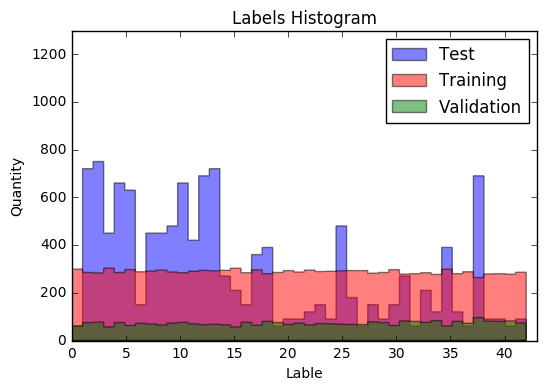

In [4]:
dataSetInfo(X_train, y_train, X_test, y_test, X_valid, y_valid)

# Data set visualization

visualize_augmentation(X_train)

# Training model

In [5]:
#training model
saver = training_model(X_train, y_train, X_valid, y_valid, rate = 0.001)

Training...

EPOCH 1 ...
Validation Accuracy = 0.348

EPOCH 2 ...
Validation Accuracy = 0.662

EPOCH 3 ...
Validation Accuracy = 0.771

EPOCH 4 ...
Validation Accuracy = 0.823

EPOCH 5 ...
Validation Accuracy = 0.862

EPOCH 6 ...
Validation Accuracy = 0.887

EPOCH 7 ...
Validation Accuracy = 0.904

EPOCH 8 ...
Validation Accuracy = 0.912

EPOCH 9 ...
Validation Accuracy = 0.926

EPOCH 10 ...
Validation Accuracy = 0.928

EPOCH 11 ...
Validation Accuracy = 0.932

EPOCH 12 ...
Validation Accuracy = 0.935

EPOCH 13 ...
Validation Accuracy = 0.942

EPOCH 14 ...
Validation Accuracy = 0.944

EPOCH 15 ...
Validation Accuracy = 0.946

EPOCH 16 ...
Validation Accuracy = 0.949

EPOCH 17 ...
Validation Accuracy = 0.948

EPOCH 18 ...
Validation Accuracy = 0.953

EPOCH 19 ...
Validation Accuracy = 0.950

Model saved
Total time: 222.96s


# Evaluate the Model

In [6]:
import tensorflow as tf
save_file = './saved_models/model.ckpt'

saver = tf.train.import_meta_graph(save_file + '.meta')

with tf.Session() as sess:
    saver.restore(sess, save_file)
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.809


# Predict other traffic signs

Image  0 [[17 16 24]]
 Preditcion Image Label = [28]        Web Image Label = 27


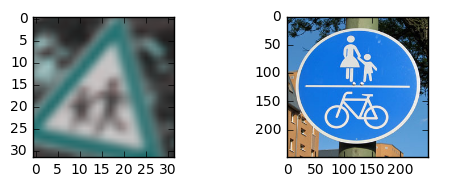

Image  1 [[28 23  0]]
 Preditcion Image Label = [35]        Web Image Label = 35


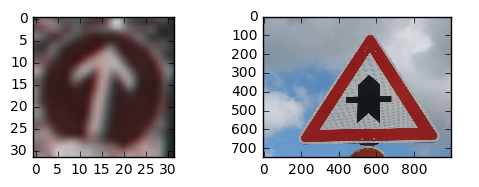

Image  2 [[42 23  9]]
 Preditcion Image Label = [1]        Web Image Label = 37


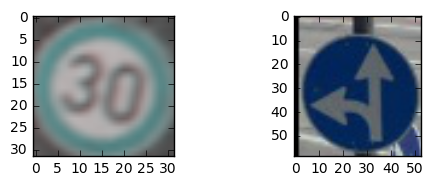

Image  3 [[18 22  9]]
 Preditcion Image Label = [16]        Web Image Label = 14


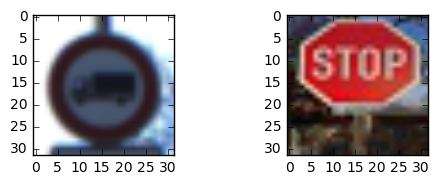

Image  4 [[21 28 38]]
 Preditcion Image Label = [23]        Web Image Label = 03


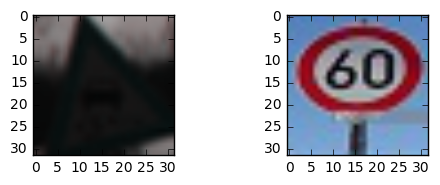

Image  5 [[21 24 13]]
 Preditcion Image Label = [27]        Web Image Label = 25


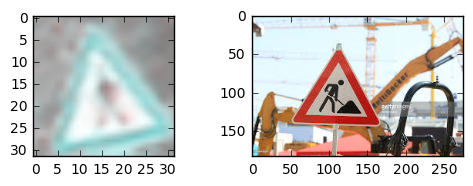

Image  6 [[27 24 17]]
 Preditcion Image Label = [9]        Web Image Label = 17


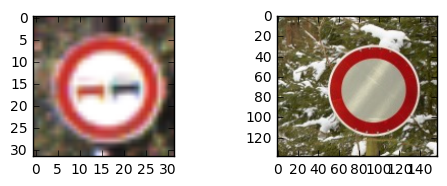

Image  7 [[28 32 30]]
 Preditcion Image Label = [22]        Web Image Label = 36


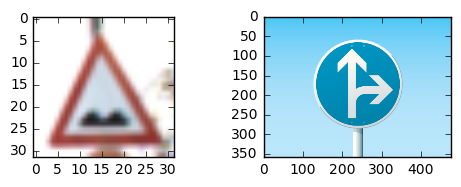

Image  8 [[30 38  4]]
 Preditcion Image Label = [15]        Web Image Label = 09


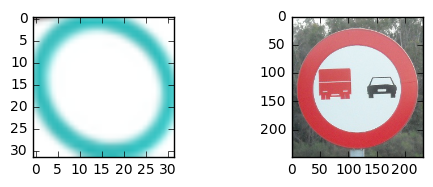

Image  9 [[38 36 23]]
 Preditcion Image Label = [9]        Web Image Label = 12


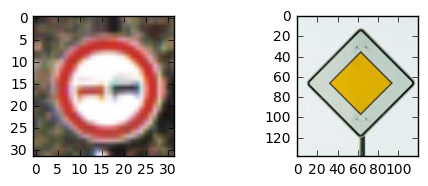

In [7]:
import glob
#import images
imgLabes = []
images = []
for img in glob.glob("Test_Images/*.jpg"):
    images.append(mpimg.imread(img))
    imgLabes.append(img)

predict(images, imgLabes, save_file, y_train, X_train)